# Project 3 -Mapping the Landscape of Generative AI Research through Web of Science

The goal of this effort is to find papers on generative AI by searching the wide-ranging Web of Science (WoS) database. By using a method of analysis based on keyword co-occurrence networks that are derived from author keywords, we will be able to map the conceptual framework of generative AI research and identify dominant themes and trends.

**Steps Involved In the project**

1)Data Genration and Loading

2) Splitting Data

3) Converting words into Lowercase

4) Computing Frequency Count

5) Creating undirected graph

6) Plotting Co-occurance Network

7) Adjacency matrix

8) Calculating the Co-occurance Count


In [49]:
#Importing nltk(natural language toolkit) and all required lib
import nltk
import pandas as pd
from collections import Counter
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import networkx as nx

In [50]:
#Connecting Google drive to colab for importing Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:

%cd /content/drive/MyDrive/FDA_Northeastern/Project3/

/content/drive/MyDrive/FDA_Northeastern/Project3


### Data Genration and Loading

The project's data is gathered by searching the Web of Science database for articles on generative AI for year 2024

In [55]:
df=pd.read_csv('webofscience.csv')


In [56]:
df.head()

,Author Keywords,ISSN
0,arguments; creativity; generative artificial i...,0824-2577
1,artificial intelligence governance; artificial...,1461-4448
2,Generative artificial intelligence; innovation...,0887-4417
3,Generative artificial intelligence; Telecom; 6...,0003-4347
4,Generative artificial intelligence; Large lang...,0160-791X


### Droping ISSN table
ISSN and Author keywords both are unique columns and only one unique column is neccasary ,so droping ISSN table

In [57]:

df = df.drop(columns=['ISSN'])


In [58]:
df.head()

,Author Keywords
0,arguments; creativity; generative artificial i...
1,artificial intelligence governance; artificial...
2,Generative artificial intelligence; innovation...
3,Generative artificial intelligence; Telecom; 6...
4,Generative artificial intelligence; Large lang...


Checking if any of the values in my data are null, and removing those that are

In [59]:
df.isna().sum()

Author Keywords    136
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.isna().sum()

Author Keywords    0
dtype: int64

### Splitting Data
Splitting Author Keywords table into single words for calculating word frequency count and co-occurance network.For Splitting (string.split)is used and the reference for splitting words is a comma(;)

In [62]:
dividing = df['Author Keywords'].str.split(';', expand=True)

In [63]:
dividing.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,arguments,creativity,generative artificial intelligence,universal audience,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,artificial intelligence governance,artificial intelligence regulation,generative artificial intelligence,generative models,inspectability,large language models,modifiability,observability,regulatory objects,None,...,None,None,None,None,None,None,None,None,None,None
2,Generative artificial intelligence,innovation diffusion,TOE framework,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Generative artificial intelligence,Telecom,6 G,5 G,Survey,Application,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Generative artificial intelligence,Large language models,Generative adversarial networks,Harms,Power,Inequality,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Converting into Lowercase
Here i am converting all the seperated words into lowercase.This is done to normalise the data and ensure that words with different capitalization are treated as the same words

In the below code i am using applymap function to apply lamda function .This will apply lamda function to each element of data frame.The string are converted by x.lower()


In [64]:
# converting into lowercase
lowercase = dividing.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
lowercase.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,arguments,creativity,generative artificial intelligence,universal audience,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,artificial intelligence governance,artificial intelligence regulation,generative artificial intelligence,generative models,inspectability,large language models,modifiability,observability,regulatory objects,None,...,None,None,None,None,None,None,None,None,None,None
2,generative artificial intelligence,innovation diffusion,toe framework,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,generative artificial intelligence,telecom,6 g,5 g,survey,application,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,generative artificial intelligence,large language models,generative adversarial networks,harms,power,inequality,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Calculating Frequency Count
This code will calculate frequency distribution of all the words

the stack() method is used to convert and stacking the columns into a single level and the tolist method is use to convert the series into a python list

Next the counter class from collection module is used to count the frequency of the words and storing it into frequency

The frequency  from counter is converted into df.The table returned shows all words with its frequency count
words like artificial intelligence,chatgpt have the hightest occurance



In [65]:

Every_words = lowercase.stack().tolist()

#  frequency distribution
frequency = Counter(Every_words)


frequency_words = pd.DataFrame(frequency.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

frequency_words.head().reset_index(drop=True)

# Top 4 frequent Words


,Word,Frequency
0,artificial intelligence,311
1,generative artificial intelligence,292
2,chatgpt,213
3,deep learning,62
4,generative adversarial networks,60


### Creating Undirected graph for Co-occurance network

First, I am initializing an undirected graph using nx.Graph()
Then a loop is initiated which will iterate to each word in lowercase df. Then It creates a list called all_keywords for every row after filtering out Null values.

The code then makes edges between every pair of keywords in the all_keywords list for every keyword. Using nested loops, it iterates through each keyword combination, adding an edge between them.

Printing the basic information about the graph. The number of nodes and edges are 2988 and 16149 respectively

In [66]:

# Initialize an undirected graph
undirected_graph = nx.Graph()


for index, row in lowercase.iterrows():
    all_keywords = [keyword for keyword in row if keyword is not None]
    for i in range(len(all_keywords)):
        for j in range(i + 1, len(all_keywords)):
            if undirected_graph.has_edge(all_keywords[i], all_keywords[j]):
                undirected_graph[all_keywords[i]][all_keywords[j]]['weight'] += 1
            else:
                undirected_graph.add_edge(all_keywords[i], all_keywords[j], weight=1)


undirected_graph


## Plotting Co-occurrence Network
In the previous Step we initiated a undirected Graph and ruturn Number of Nodes and edges.Now we are plotting Co-occurrence network

Before Plotting I am sorting the nodes of undirrected_graph based on number of edges incident to the node in decending order ,for sorting i have used .subgraph .

For plotting NetworkX and Matplotlib is used.The nx.draw_networkx() function is used to draw the network with nodes.For plotting i have selected top 60 nodes with highest degree in co-occurance Network

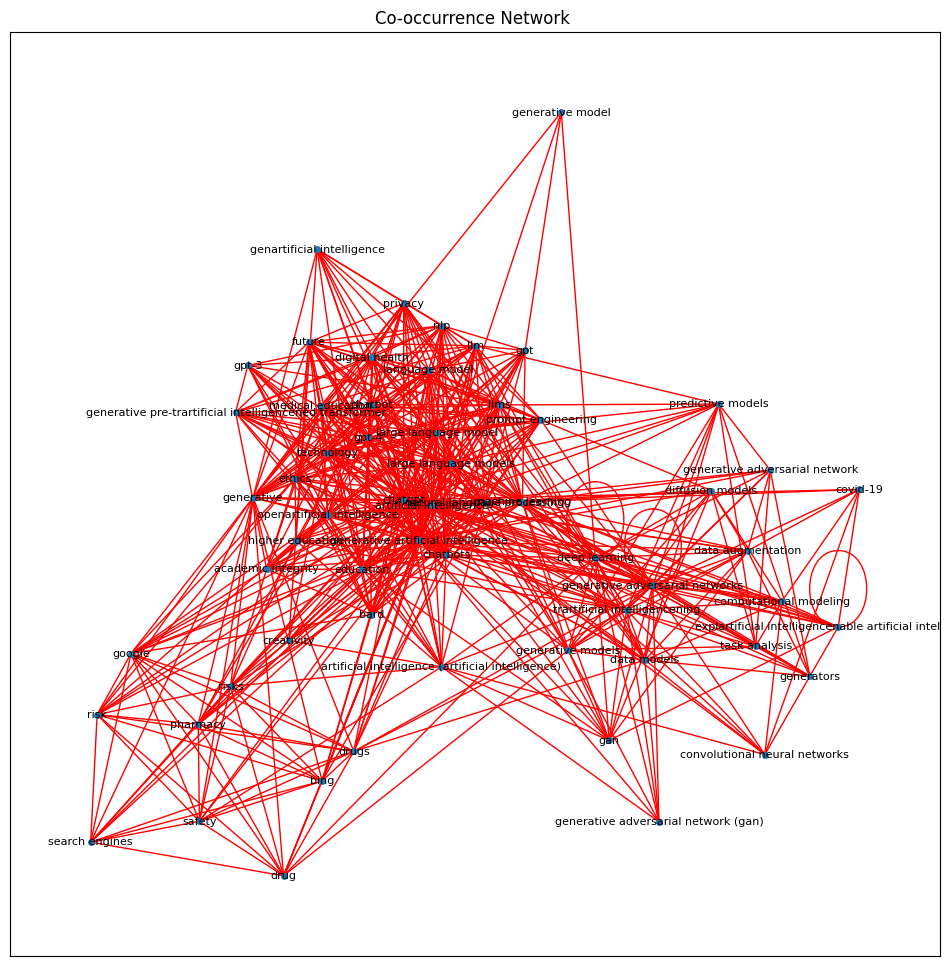

In [67]:

network_node = sorted(undirected_graph.degree, key=lambda x: x[1], reverse=True)[:60]
netword_gr = undirected_graph.subgraph([node[0] for node in network_node])

#Plotting Graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(netword_gr, seed=42)
nx.draw_networkx(netword_gr, pos, node_size=20, with_labels=True, font_size=8, edge_color="red", linewidths=0.5)
plt.title("Co-occurrence Network ")
plt.show()


### Adjacency matrix

Here I am calculating adjacency matrix of the entire graph.The nx.adjacency_matrix function from networkX will create the adjacency matrix

To make it more readable i converted the adjacent matrix to a dense dataframe by using .todense()



In [68]:

matrix = nx.adjacency_matrix(undirected_graph)
matrix_df = pd.DataFrame(matrix.todense(), index=undirected_graph.nodes(), columns=undirected_graph.nodes())

matrix_df


,arguments,creativity,generative artificial intelligence,universal audience,artificial intelligence governance,artificial intelligence regulation,generative models,inspectability,large language models,modifiability,...,cone-beam ct (cbct),dose calculation,dose verification,image guidance,positron emission tomography (pet),proton therapy,quality assurance (qa),treatment planning,entrustable professional activities,competency-based education
arguments,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
creativity,1,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
generative artificial intelligence,1,5,3,1,4,2,3,1,30,1,...,0,0,0,0,0,0,0,0,0,0
universal audience,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
artificial intelligence governance,0,0,4,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
proton therapy,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,0,0
quality assurance (qa),0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,0,0
treatment planning,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
entrustable professional activities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Co-occurrence Count
co-occurrence_count= matrix.sum(axis=1) this will sum all the values in each row so as to get the Co-occurrence count

In [69]:

cooccurrence_count= matrix.sum(axis=1)

cooccurrence_count_df = pd.DataFrame(cooccurrence_count, index=undirected_graph.nodes(), columns=['Co-occurrence Count'])
cooccurrence_count_df.head()


,Co-occurrence Count
arguments,3
creativity,80
generative artificial intelligence,1498
universal audience,3
artificial intelligence governance,22


Here i am printing top ten words with highest Co-occurrence Count to get better understanding and Insights

To find the top ten words with highest co_occurrence i firsr sorted the data frame and the printed top 3 using head()

In [70]:
# Sorting the sum to get top 10
sorted_cooccurrence= cooccurrence_count_df.sort_values(by='Co-occurrence Count', ascending=False)
sorted_cooccurrence.head(10)


,Co-occurrence Count
artificial intelligence,2001
generative artificial intelligence,1498
chatgpt,1325
machine learning,386
generative adversarial networks,376
deep learning,349
large language models,335
natural language processing,214
chatbots,211
large language model,206


In [71]:
#to get keywords with least co-occurrence
sorted_cooccurrence.tail(10)

,Co-occurrence Count
academic writing pedagogy,2
computational co-authorship,2
electronic medical records,2
data-driven modeling,2
opinion mining,2
automated university reputation measurement,2
emotion regulation,2
sustartificial intelligencenability reporting,1
public administrations,1
otolaryngology,1


# Insights
 Their can be many Conclusions from all the plots and table from the project Some of them are

 1)These keywords indicate that the article being analyzed are probably going to be about artificial intelligence (AI), especially generative AI and its uses in machine learning.

 2)These keywords'co-occurrence suggests that they frequently come up in the same context. For instance, topics related to machine learning and artificial intelligence may frequently come up in ChatGPT talks, particularly when generative AI applications are being discussed.


 3)Researchers or anyone interested in creating generative AI applications will gain a clear idea about which topics are associated with generative AI and should be focused on more in the R&D process.

 4)The highest co-occurance also suggest that topics like Deep learning,NLP are very popular when it comes to genrative Ai and are used widely in the same space

 5)The keywords with least co-occurance suggests that the keywords are not related or can also suggests that the terms are not yet touched and may have future scope
